# Exercise 13
## Angelita Gozaly
## s1282003

## __Mining Frequent Patterns from Air Pollution Data__

### __Data Preprocessing__

In [11]:
import pandas as pd
from PAMI.extras.DF2DB import denseDF2DB as pro

class DataPreprocessing:
    """
    A class for performing data preprocessing and converting a dense DataFrame to a transactional database.

    Attributes
    ----------
    input_file
        The path to the input CSV file.
    df
        The DataFrame that holds the data after reading the input CSV file.

    Methods
    -------
    preprocess_data()
        Read the CSV file, perform data preprocessing, and return the processed DataFrame.
    convert_to_transactional_database()
        Convert the dense DataFrame to a transactional database with a threshold value of 15 and condition ">=".
        Save the resulting database as "PM24HeavyPollutionRecordingSensors.csv".
    """

    def __init__(self, input_file):
        """
        Constructor for the DataPreprocessing class.

        Parameters
        ----------
        input_file
            The path to the input CSV file.
        """
        
        self.input_file = input_file
        self.df = None

    def preprocess_data(self):
        """
        Read the CSV file, perform data preprocessing, and return the processed DataFrame.
        """
        
        # Read the CSV file into a DataFrame
        self.df = pd.read_csv(self.input_file)

        # Convert "NaN" strings to actual NaN values for proper handling
        self.df = self.df.apply(pd.to_numeric, errors='coerce')

        # Replace NaN values with zero
        self.df.fillna(0, inplace=True)

        # Replace values greater than or equal to 100 with zero
        self.df[self.df >= 100] = 0

        # Rename the "Timestamp" column to "tid"
        self.df.rename(columns={"Timestamp": "tid"}, inplace=True)

        # Replace existing values of the "tid" column with sequential integers
        self.df["tid"] = range(1, len(self.df) + 1)

    def convert_to_transactional_database(self):
        """
        Convert the dense DataFrame to a transactional database with a threshold value of 15 and condition ">=".
        Save the resulting database as "PM24HeavyPollutionRecordingSensors.csv".
        """
        
        # Perform data preprocessing
        self.preprocess_data()

        # Remove the "tid" column from the DataFrame as it's not needed in the transactional database
        self.df.drop(columns=["tid"], inplace=True)

        # Convert the DataFrame to a transactional database
        db = pro.denseDF2DB(inputDF=self.df, thresholdValue=15, condition='>=')

        # Convert and store the database as a CSV file
        output_file = "PM24HeavyPollutionRecordingSensors.csv"
        db.createTransactional(outputFile=output_file)
        
        # Print message that the transactional database is succesfully created
        print(f"Transactional database saved as '{output_file}'.")

if __name__ == "__main__":
    input_file = "airPollutionData.csv"
    data_preprocessing = DataPreprocessing(input_file)
    data_preprocessing.convert_to_transactional_database()


Transactional database saved as 'PM24HeavyPollutionRecordingSensors.csv'.


### __Knowledge Discovery__

#### Implementation of Chapter 5

##### _Printing All Statistics_

Database size (total no of transactions) : 744
Number of items : 941
Minimum Transaction Size : 1
Average Transaction Size : 161.04166666666666
Maximum Transaction Size : 897
Standard Deviation Transaction Size : 202.73042017390702
Variance in Transaction Sizes : 41154.939042171376
Sparsity : 0.8288611406305348


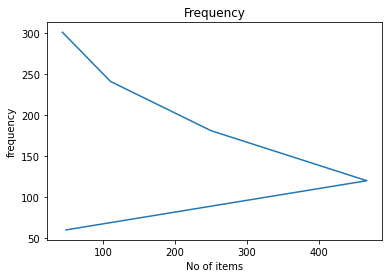

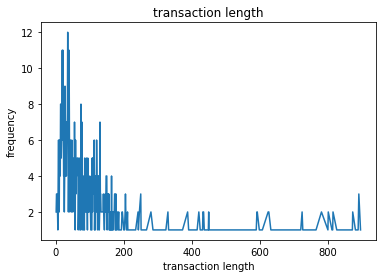

In [12]:
import PAMI.extras.dbStats.transactionalDatabaseStats as stats

class TransactionalDatabaseStats:
    """
    A class to get the statistical details of a transactional database.

    Attributes
    ----------
    input_file
        The path to the input transactional database CSV file.

    Methods
    -------
    __init__(input_file)
        Initializing the TransactionalDatabaseStats class
    get_stats()
        Get and print all the statistical details of the transactional database.
    """

    def __init__(self, input_file):
        """
        Constructor for the TransactionalDatabaseStats class.

        Parameters
        ----------
        input_file : str
            The path to the input transactional database CSV file.
        """
        
        self.input_file = input_file

    def get_stats(self):
        """
        Get and print all the statistical details of the transactional database.
        """
        
        # Initialize the transactionalDatabaseStats class
        obj = stats.transactionalDatabaseStats(self.input_file, sep='\t')
        obj.run()

        # Print the complete statistical details of the database
        obj.printStats()

        # Plot the graphs containing the statistical details of the database
        obj.plotGraphs()

if __name__ == "__main__":
    input_file = 'PM24HeavyPollutionRecordingSensors.csv'
    stats_generator = TransactionalDatabaseStats(input_file)
    stats_generator.get_stats()


##### _Printing Individual Statistics_

In [14]:
import PAMI.extras.dbStats.transactionalDatabaseStats as tds

class TransactionalDatabaseStatsIndividual:
    """
    A class to run the transactionalDatabaseStats program and print database statistics.

    Attributes
    ----------
    input_file : str
        The path to the input transactional database CSV file.

    Methods
    -------
    __init__(input_file)
        Initializing the TransactionalDatabaseStats class
    get_stats()
        Get and print all the statistical details of the transactional database.
    """

    def __init__(self, input_file):
        """
        Constructor for the TransactionalDatabaseStatsIndividual class.

        Parameters
        ----------
        input_file : str
            The path to the input transactional database CSV file.
        """
        
        self.input_file = input_file

    def get_stats(self):
        """
        Get and print all the statistical details of the transactional database.
        """
        
        # Initialize the transactionalDatabaseStats class
        obj = tds.transactionalDatabaseStats(self.input_file, sep='\t')
        obj.run()

        # Print the database statistics
        print(f'Database size : {obj.getDatabaseSize()}')
        print(f'Total number of items : {obj.getTotalNumberOfItems()}')
        print(f'Database sparsity : {obj.getSparsity()}')
        print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
        print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
        print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
        print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
        print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

        # Get the sorted dictionary of item frequencies
        item_frequencies = obj.getSortedListOfItemFrequencies()

        # Get the transaction length distribution
        transaction_length = obj.getTransanctionalLengthDistribution()

        # Save the item frequencies to a CSV file
        obj.save(item_frequencies, 'itemFrequency.csv')

        # Save the transaction length distribution to a CSV file
        obj.save(transaction_length, 'transactionSize.csv')

if __name__ == "__main__":
    input_file = 'PM24HeavyPollutionRecordingSensors.csv'
    stats_individual = TransactionalDatabaseStatsIndividual(input_file)
    stats_individual.get_stats()


Database size : 744
Total number of items : 941
Database sparsity : 0.8288611406305348
Minimum Transaction Size : 1
Average Transaction Size : 161.04166666666666
Maximum Transaction Size : 897
Standard Deviation Transaction Size : 202.73042017390702
Variance in Transaction Sizes : 41154.939042171376


#### Implementation of FP-growth algorithm

In [2]:
from PAMI.frequentPattern.basic import FPGrowth as alg

class PatternMining:
    """
    PatternMining class for mining frequent patterns using FP-growth algorithm.

    Attributes
    ----------
    input_file
        The name of the input file containing the transactional database.
        
    Methods
    -------
    __init__(input_file)
        The constructor of the PatternMining class.
    mine_frequent_patterns()
        Function to mine the frequent patterns from the transactional database, using FP-growth algorithm.
    """

    def __init__(self, input_file):
        """
        Initialize the PatternMining class.

        Parameters
        ----------
        input_file
            The name of the input file containing the transactional database.
        """
        
        self.input_file = input_file

    def mine_frequent_patterns(self):
        """
        Mine frequent patterns using FP-growth with the selected minSup count.
        """
        minSup = 160

        # Create the object of the mining algorithm
        obj = alg.FPGrowth(iFile=self.input_file, minSup=minSup, sep='\t')

        # Start the mining process
        obj.startMine()
        
        # Save frequent patterns as txt file
        obj.save('frequentPatterns.txt')

        # Print the number of patterns, runtime, and memory consumed
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) # print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) # print the runtime
        print('Memory (RSS): ' + str(obj.getMemoryRSS()))
        print('Memory (USS): ' + str(obj.getMemoryUSS()))
        
if __name__ == "__main__":
    input_file = 'PM24HeavyPollutionRecordingSensors.csv'
    
    # Initialize the PatternMining class
    pattern_mining = PatternMining(input_file)

    # Mine frequent patterns using FP-growth and get the results
    pattern_mining.mine_frequent_patterns()


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9296
Runtime: 1.555161952972412
Memory (RSS): 186707968
Memory (USS): 128471040


### __Visualization__

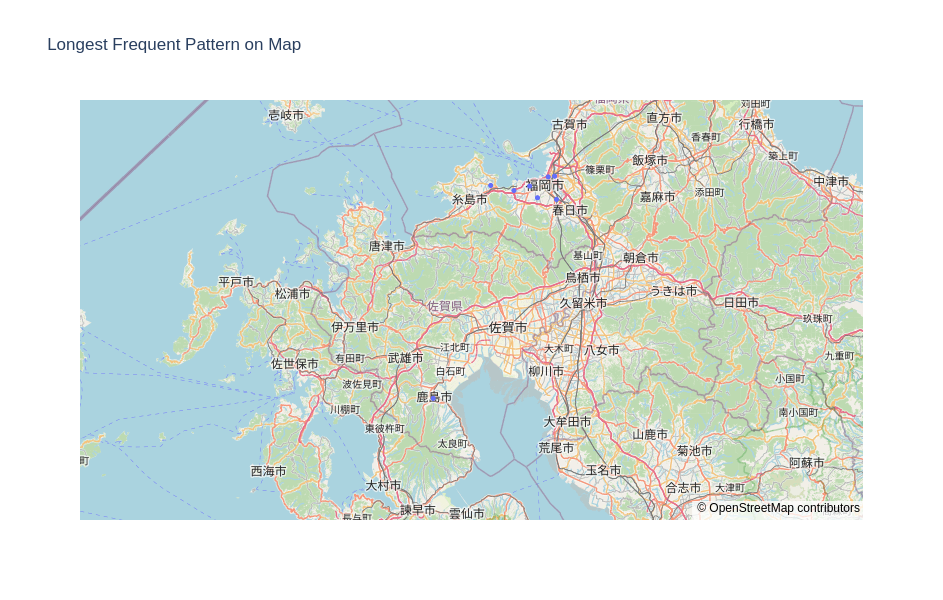

In [41]:
import plotly.express as px
import pandas as pd

class PatternVisualization:
    """
    A class for finding and plotting the longest frequent pattern.

    Attributes
    ----------
    file_path
        The path to the frequentPatterns.txt file.

    Methods
    -------
    find_longest_pattern()
        Find the longest frequent pattern in the file and return it.
    extract_points()
        Extract longitude and latitude from each point in the pattern.
    plot_longest_pattern_on_map()
        Plot the longest frequent pattern on an OpenStreetMap using Plotly Express.
    """

    def __init__(self, file_path):
        """
        Initialize the PatternVisualization class.

        Parameters
        ----------
        file_path
            The path to the frequentPatterns.txt file.
        """
        self.file_path = file_path

    def find_longest_pattern(self):
        """
        Find the longest frequent pattern in the frequentPatterns.txt file.

        Returns
        -------
        longest_pattern
            The longest frequent pattern found.
        """
        longest_pattern = None
        with open(self.file_path, 'r') as file:
            for line in file:
                # Extract the pattern from each line
                pattern_info = line.strip().split(':')
                pattern = pattern_info[0].strip()

                # Check if the current pattern is longer than the previous longest pattern
                if longest_pattern is None or len(pattern.split()) > len(longest_pattern.split()):
                    longest_pattern = pattern

        return longest_pattern

    def extract_points(self):
        """
        Extract longitude and latitude from each point in the pattern.

        Returns
        -------
        df
            A DataFrame containing columns 'longitude' and 'latitude'.
        """
        longest_pattern = self.find_longest_pattern()
        # Split the longest pattern by points
        points = longest_pattern.split('\t')

        # Extract longitude and latitude from each point and store them in separate lists
        data = []
        for point in points:
            # Remove "Point(" and ")" from the point string and split by space
            coordinates = point.replace("Point(", "").replace(")", "").strip().split()
            longitude, latitude = float(coordinates[0]), float(coordinates[1])
            data.append({'longitude': longitude, 'latitude': latitude})

        df = pd.DataFrame(data)
        return df

    def plot_longest_pattern_on_map(self):
        """
        Plot the longest frequent pattern on an OpenStreetMap using Plotly Express.
        """
        df = self.extract_points()
        fig = px.scatter_mapbox(
            data_frame=df,
            lat='latitude',
            lon='longitude',
            center={'lat': 33.3, 'lon': 130.2},
            zoom=8,
            mapbox_style="open-street-map",
            title="Longest Frequent Pattern on Map",
            height=600,
            width=800
        )
        fig.show()

if __name__ == "__main__":
    file_path = 'frequentPatterns.txt'

    # Create the PatternVisualization object
    pattern_visualization = PatternVisualization(file_path)

    # Plot the longest pattern on an OpenStreetMap using Plotly Express
    pattern_visualization.plot_longest_pattern_on_map()
